# A7. The Binomial Distribution

-----

    2020-10-13


In [1]:
import scipy.stats as stats
import pandas as pd
import seaborn as sns

An examination consists of twenty multiple choice questions.
For each question, the correct answer is one of five options.
The random variable $T$ denotes the number of correct answers obtained by a student who guesses answers at random, has a binomial distribution $T \sim B(20, 0.2)$.

## Declare the distribution

In [2]:
t: object = stats.binom(20, 0.2)

## Calculate a probability mass function $P(T=t)$

Calculate the associated p.m.f. $P(T=10)$

In [3]:
# calculate P(T=10)
t.pmf(10)

0.002031413703013826

## Calculate a cumulative distribution function $P(T \leq t)$

Calculate the associated c.d.f. $P(T<10)$

In [4]:
# calculate P(T <= 9)
t.cdf(9)

0.997405172599326

## Further examples

Suppose that students have to retake the module the following year if they answer fewer than four questions out of twenty correctly.
What is the probability that a student who guesses answers at random has to
retake the module?

In [5]:
# Calculate P(X<4)
t.pmf(3)

0.2053641430080944

Students who fail the examination (that is, score less than 10) are allowed to resit the examination without retaking the whole module if they answer at least four out of the twenty questions correctly.
What is the probability that a student who guesses answers at random fails but is allowed to resit the examination?

In [6]:
# Calculate P(4 <= T < 10)
# F(9) - F(3)
t.cdf(9) - t.cdf(3)

0.5859563106427566

## Output a binomial distribution to a `pd.DataFrame`

In [7]:
# declare the DataFrame, name the columns
df_T: object = pd.DataFrame()

In [8]:
# list for t
a_list_for_T: list = list()
for i in range(0, 21):
    a_list_for_T.append(i)

# append to DF, name the column
df_T['T=t'] = a_list_for_T

In [9]:
# create a dict for pmf
a_dict_pmf: dict = dict()

for j in a_list_for_T:
    a_dict_pmf[j] = round(t.pmf(j), 5)

# copy the T=t column
df_T['P(T=t)'] = df_T['T=t']
# dictionary replace columns in p.m.f.
df_T['P(T=t)'].replace(a_dict_pmf, inplace=True)

In [10]:
# create a dict for cdf
a_dict_cdf: dict = dict()

for j in a_list_for_T:
    a_dict_cdf[j] = round(t.cdf(j), 5)

# copy the T=t column
df_T['P(T<=t)'] = df_T['T=t']
# dictionary replace columns in c.d.f.
df_T['P(T<=t)'].replace(a_dict_cdf, inplace=True)

In [11]:
df_T

,T=t,P(T=t),P(T<=t)
0,0,0.01153,0.01153
1,1,0.05765,0.06918
2,2,0.13691,0.20608
3,3,0.20536,0.41145
4,4,0.21820,0.62965
5,5,0.17456,0.80421
6,6,0.10910,0.91331
7,7,0.05455,0.96786
8,8,0.02216,0.99002
9,9,0.00739,0.99741


## Visualise the distribution

[Text(0, 0.5, 'P(T=t)'), Text(0.5, 1.0, 'Distribution of B(20,0.2)')]

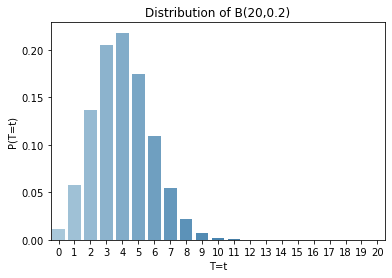

In [12]:
ax = sns.barplot(data=df_T,
                 x='T=t',
                 y='P(T=t)',
                 palette="Blues_d")

ax.set(ylabel="P(T=t)", title="Distribution of B(20,0.2)")